<a href="https://colab.research.google.com/github/Faton98/CustomerSegmentation/blob/master/CustomerSeg_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Segmentation Clustering (K-Means)**

> Import Libraries 






In [15]:
#import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import plotly.graph_objs as go
import plotly as py
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import sklearn.utils
import random

In [16]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [17]:
!ls "/content/drive/My Drive/Project/customer_segmentation_data.csv"

'/content/drive/My Drive/Project/customer_segmentation_data.csv'


In [18]:
#Reading the raw data 
data = pd.read_csv("drive/My Drive/Project/customer_segmentation_data.csv")

In [19]:
data

,CustID,Gender,Age,AnnualIncome,CustScore (1-100),Hometown,FavoriteTime
0,1,Female,20,20000,1,Jakarta,Weekend
1,2,Male,21,34000,81,Jakarta,Weekend
2,3,Female,18,12350,1,Jakarta,Weekend
3,4,Male,45,12000,1,Bandung,Weekday
4,5,Male,31,18000,10,Bandung,Weekend
...,...,...,...,...,...,...,...
195,196,Female,35,67500,79,Bandung,Weekday
196,197,Female,45,76000,28,Bandung,Weekday
197,198,Male,32,89000,74,Bandung,Weekday
198,199,Male,32,90000,18,Bandung,Weekday


In [20]:
data.set_index('CustID', inplace=True)



> Data Exploration



In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             200 non-null    object
 1   Age                200 non-null    int64 
 2   AnnualIncome       200 non-null    int64 
 3   CustScore (1-100)  200 non-null    int64 
 4   Hometown           200 non-null    object
 5   FavoriteTime       200 non-null    object
dtypes: int64(3), object(3)
memory usage: 10.9+ KB


In [22]:
# melihat ukuran/dimensi data
data.shape

(200, 6)

Karena column CustomerID sudah dihapus, jadinya ukuran data menjadi 6 kolom dengan 200 record

In [23]:
# menampilkan data dengan indeks 5 teratas
data.head()

,Gender,Age,AnnualIncome,CustScore (1-100),Hometown,FavoriteTime
CustID,,,,,,
1,Female,20,20000,1,Jakarta,Weekend
2,Male,21,34000,81,Jakarta,Weekend
3,Female,18,12350,1,Jakarta,Weekend
4,Male,45,12000,1,Bandung,Weekday
5,Male,31,18000,10,Bandung,Weekend


replace string to integer 

In [24]:
data.describe()

,Age,AnnualIncome,CustScore (1-100)
count,200.000000,200.000000,200.000000
mean,39.415000,44234.100000,46.915000
std,13.956241,21477.387318,28.979941
min,18.000000,10000.000000,1.000000
25%,30.000000,24545.000000,22.000000
50%,36.000000,45000.000000,46.000000
75%,49.000000,60000.000000,69.000000
max,75.000000,90000.000000,100.000000


Statistical Insights : 


> Rata-rata usia customer yang membeli adalah 39 tahun dengan usia minimal 18 tahun dan maksimal 75 tahun 

> 3/4 customer yang membeli rata-rata usia 49 tahun

> Average Annual Income of customer purchsing in Rata-rata gaji tahunan dari customer yang membeli di mall adalah 60.000000, max 90.000000 dan min 10.000000







Data Cleaning

In [25]:
data.isna().sum()

Gender               0
Age                  0
AnnualIncome         0
CustScore (1-100)    0
Hometown             0
FavoriteTime         0
dtype: int64

In [26]:
data.duplicated().sum()
random.seed(10)

In [27]:
data['AnnualIncome'] = data['AnnualIncome'].div(1000)

In [28]:
#data['Gender'].replace({'Female':'0','Male':'1'},inplace=True)
data['Gender'].replace(['Female','Male'], [0,1],inplace=True)
data['FavoriteTime'].replace(['Weekend','Weekday'], [0,1],inplace=True)
data['Hometown'].replace(['Jakarta', 'Bandung', 'Surabaya', 'Solo', 'Semarang', 'Padang', 'Palangkaraya'], [1,2,3,4,5,6,7], inplace=True)
data.head()

,Gender,Age,AnnualIncome,CustScore (1-100),Hometown,FavoriteTime
CustID,,,,,,
1,0,20,20.00,1,1,0
2,1,21,34.00,81,1,0
3,0,18,12.35,1,1,0
4,1,45,12.00,1,2,1
5,1,31,18.00,10,2,0


There are no duplicated or missing values

Data Visualization

In [29]:
data.columns

Index(['Gender', 'Age', 'AnnualIncome', 'CustScore (1-100)', 'Hometown',
       'FavoriteTime'],
      dtype='object')

In [30]:
data.rename(columns={'AnnualIncome': 'Annual_Income', 'CustScore (1-100)': 'Spending_Score'}, inplace = True)

In [31]:
data.head()

,Gender,Age,Annual_Income,Spending_Score,Hometown,FavoriteTime
CustID,,,,,,
1,0,20,20.00,1,1,0
2,1,21,34.00,81,1,0
3,0,18,12.35,1,1,0
4,1,45,12.00,1,2,1
5,1,31,18.00,10,2,0


Scatterplot

<Figure size 1080x720 with 0 Axes>

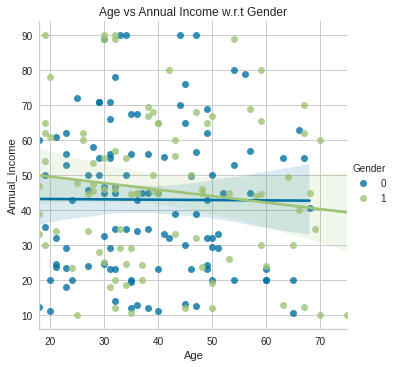

In [32]:
plt.figure(1, figsize =(15,10))
sns.lmplot(x = 'Age', y ='Annual_Income', hue='Gender', data = data)
plt.xlabel('Age'), plt.ylabel('Annual_Income')
plt.title('Age vs Annual Income w.r.t Gender')
plt.show()

Analysis:
1. Rata rata Pria memiliki pendapatan tahunan lebih besar dari pada wanita hingga usia 60
2. Setelah 55 tahun, Pria lebih cenderung mendapatkan pendapatan lebih rendah dari pasangan wanita


<Figure size 1080x432 with 0 Axes>

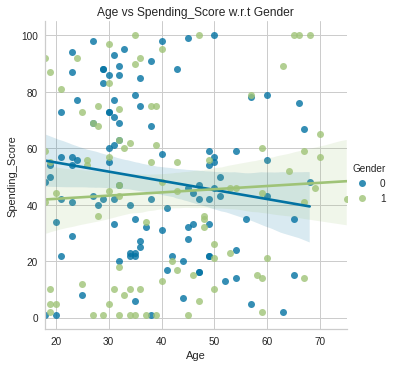

In [33]:
plt.figure(1 , figsize = (15 , 6))
sns.lmplot(x='Age', y='Spending_Score', hue='Gender', data=data)
plt.xlabel('Age'), plt.ylabel('Spending_Score') 
plt.title('Age vs Spending_Score w.r.t Gender')
plt.show()

Analysis:
1. Hasil analisis mengatakan gender mengatakan bahwa usia berbanding terbalik dengan spending score
2. Rata-rata, Wanita menghabiskan lebih pengeluaran dari pasangan pria hingga usia 50 tahun
3. Setelah usia 50 tahun, pengeluaran wanita sedikit berkurang

<Figure size 1080x432 with 0 Axes>

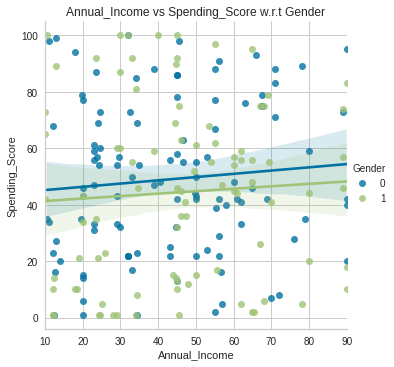

In [34]:
plt.figure(1 , figsize = (15 , 6))
sns.lmplot(x='Annual_Income', y='Spending_Score', hue='Gender', data=data)
plt.xlabel('Annual_Income'), plt.ylabel('Spending_Score') 
plt.title('Annual_Income vs Spending_Score w.r.t Gender')
plt.show()

Analysis:
1. Seiring dengan bertambahnya pendapatan, pria dan wanita cenderung menghabiskan uang lebih banyak

Distplot

Text(0.5, 1.0, 'Distplot of Spending_Score')

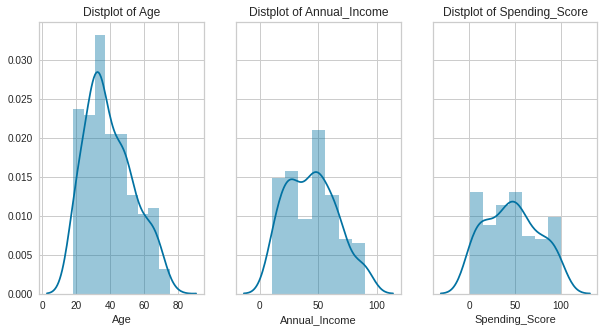

In [35]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
f.set_figheight(5)
f.set_figwidth(10)
sns.distplot(data['Age'], ax=ax1)
ax1.set_title('Distplot of Age')

sns.distplot(data['Annual_Income'], ax=ax2)
ax2.set_title('Distplot of Annual_Income')

sns.distplot(data['Spending_Score'], ax=ax3)
ax3.set_title('Distplot of Spending_Score')


Regplot

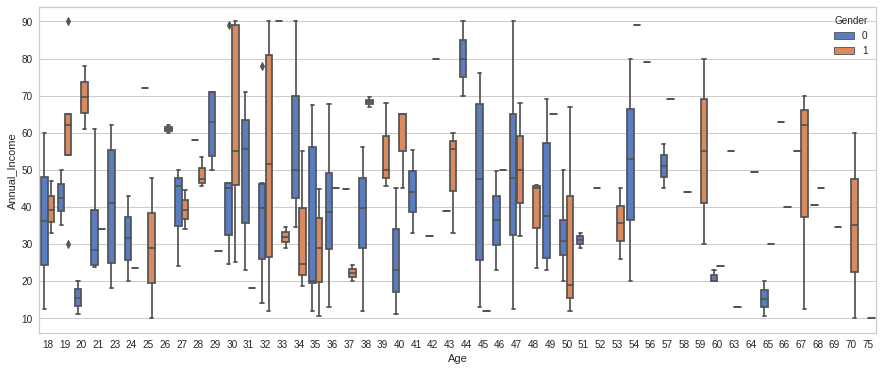

In [36]:
plt.figure(1 , figsize = (15 , 6))
ax = sns.boxplot(x="Age", y="Annual_Income", hue="Gender",data=data, palette=sns.color_palette("muted"))

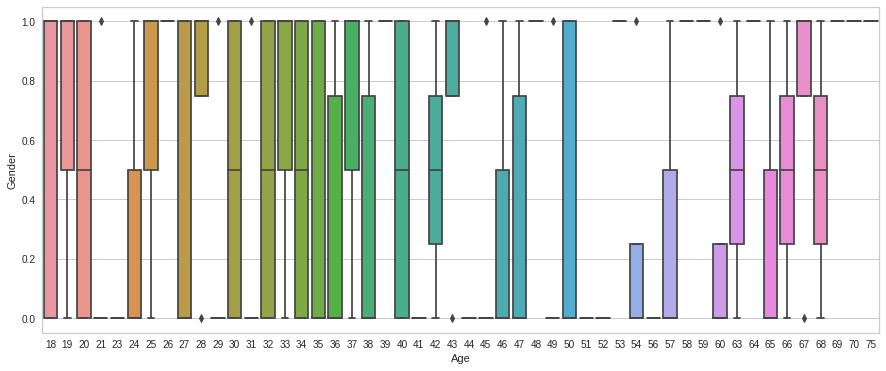

In [37]:
plt.figure(1 , figsize = (15 , 6))
ax = sns.boxplot(x="Age", y="Gender", data=data)

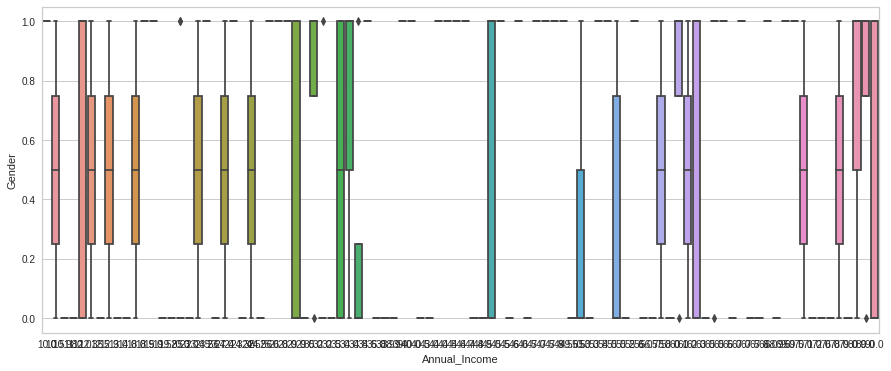

In [38]:
plt.figure(1 , figsize = (15 , 6))
ax = sns.boxplot(x="Annual_Income", y="Gender", data=data)

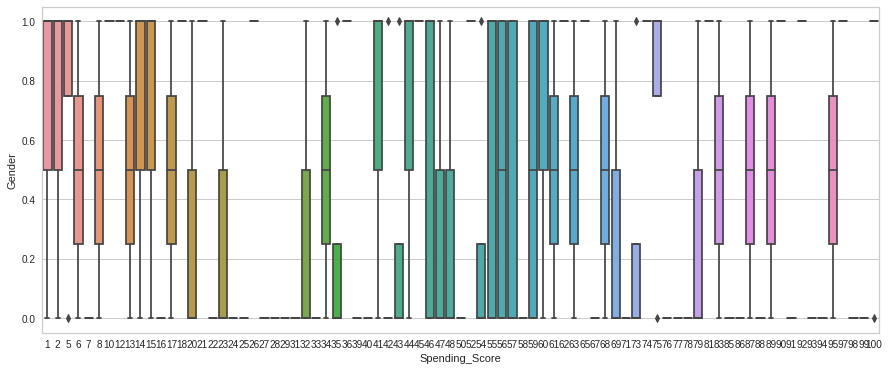

In [39]:
plt.figure(1 , figsize = (15 , 6))
ax = sns.boxplot(x="Spending_Score", y="Gender", data=data)

Menggunakan algoritma klustering:

**K-means Alhorithm**

menggunakan elbow method untuk memilih angka optimal dari kluster. elbow atau siku adalah indikasi yang baik bahwa model paling cocok pada titik itu.

**1. Segmentasi menggunakan Umur dan nilai pengeluaran**

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f24989778d0>,
                 k=None, metric=None, model=None, timings=True)

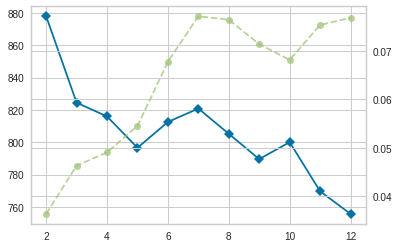

In [40]:
df1 = data[['Age', 'Spending_Score']].values
algorithm = KElbowVisualizer(KMeans(init='k-means++',algorithm='elkan'), k=12, metric="distortion")
algorithm.fit(df1)

Metrik parameter penilaian di set ke distortion, yang menghitung jumlah dari squared distance dari tiap titik ke tengah.

Visualisasi diatas menunjukan bahwa 5 kluster akan optimal dengan maksud untuk mensegmentasikan customer kita ke dalam bagian berbeda berdasarkan umur dan nilai pengeluaran

In [41]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', algorithm='elkan') )
algorithm.fit(df1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_
y_km = algorithm.fit_predict(df1)

Text(0.5, 1.0, 'Segmentation using Age and Spending Score')

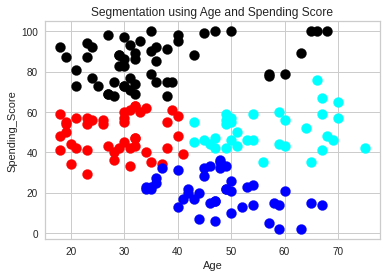

In [42]:
plt.scatter(df1[y_km ==0,0], df1[y_km == 0,1], s=100, c='red')
plt.scatter(df1[y_km ==1,0], df1[y_km == 1,1], s=100, c='black')
plt.scatter(df1[y_km ==2,0], df1[y_km == 2,1], s=100, c='blue')
plt.scatter(df1[y_km ==3,0], df1[y_km == 3,1], s=100, c='cyan')
plt.xlabel('Age')
plt.ylabel('Spending_Score')
plt.title('Segmentation using Age and Spending Score')

**2. Segmentation using Annual Income and Spending Score**

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f24988bb710>,
                 k=None, metric=None, model=None, timings=True)

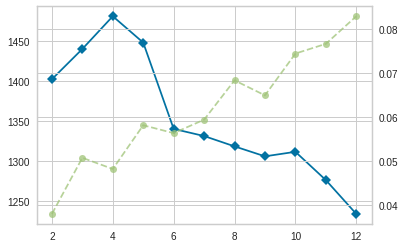

In [43]:
df2 = data[['Annual_Income', 'Spending_Score']].values
algorithm = KElbowVisualizer(KMeans(init='k-means++',algorithm='elkan'), k=12, metric="distortion")
algorithm.fit(df2)

Visualisasi diatas menunjukan bahwa 6 kluster adalah yang optimal untuk mensegmentasikan customer kita ke dalam bagian yang berbeda berdasarkan pendapatan tahunan dan nilai pengeluaran

> Indented block



In [44]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', algorithm='elkan') )
algorithm.fit(df2)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_
y_km = algorithm.fit_predict(df2)

Text(0.5, 1.0, 'Segmentation using Annual Income and Spending Score')

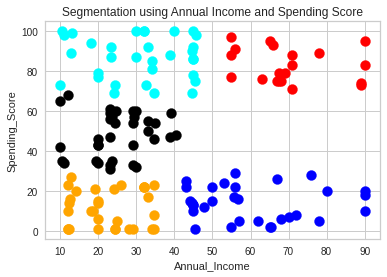

In [45]:
plt.scatter(df2[y_km ==0,0], df2[y_km == 0,1], s=100, c='red')
plt.scatter(df2[y_km ==1,0], df2[y_km == 1,1], s=100, c='black')
plt.scatter(df2[y_km ==2,0], df2[y_km == 2,1], s=100, c='blue')
plt.scatter(df2[y_km ==3,0], df2[y_km == 3,1], s=100, c='cyan')
plt.scatter(df2[y_km ==4,0], df2[y_km == 4,1], s=100, c='orange')

plt.xlabel('Annual_Income')
plt.ylabel('Spending_Score')
plt.title('Segmentation using Annual Income and Spending Score')

**3. Segmentasi menggunakan Hometown dan Gender**


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f24995a7160>,
                 k=None, metric=None, model=None, timings=True)

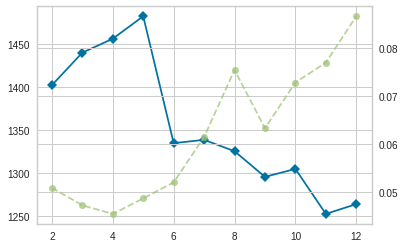

In [46]:
df4 = data[['Hometown', 'Gender']].values
algorithm = KElbowVisualizer(KMeans(init='k-means++',algorithm='elkan'), k=12, metric="distortion")
algorithm.fit(df2)

In [47]:
algorithm = (KMeans(n_clusters = 7 ,init='k-means++', algorithm='elkan') )
algorithm.fit(df4)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_
y_km = algorithm.fit_predict(df4)

Text(0.5, 1.0, 'Segmentation using Hometown and Gender')

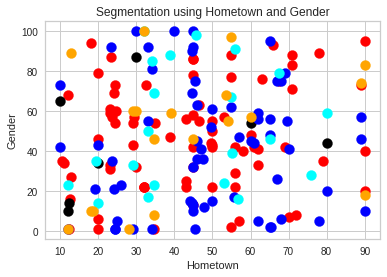

In [48]:
plt.scatter(df2[y_km ==0,0], df2[y_km == 0,1], s=100, c='red')
plt.scatter(df2[y_km ==1,0], df2[y_km == 1,1], s=100, c='black')
plt.scatter(df2[y_km ==2,0], df2[y_km == 2,1], s=100, c='blue')
plt.scatter(df2[y_km ==3,0], df2[y_km == 3,1], s=100, c='cyan')
plt.scatter(df2[y_km ==4,0], df2[y_km == 4,1], s=100, c='orange')

plt.xlabel('Hometown')
plt.ylabel('Gender')
plt.title('Segmentation using Hometown and Gender')

**4. Segmentasi menggunakan Umur, Pendapatan tahunan dan nilai pengeluaran**

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f2499808b70>,
                 k=None, metric=None, model=None, timings=True)

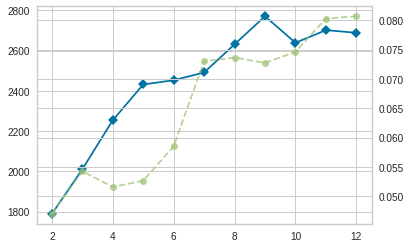

In [49]:
df3 = data[['Age','Annual_Income', 'Spending_Score']].values
algorithm = KElbowVisualizer(KMeans(init='k-means++',algorithm='elkan'), k=12, metric="distortion")
algorithm.fit(df3)


In [50]:
algorithm = (KMeans(n_clusters = 7 ,init='k-means++', algorithm='elkan') )
algorithm.fit(df3)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_
y_km = algorithm.fit_predict(df3)

In [51]:
data['Cluster'] =  labels1
trace1 = go.Scatter3d(
    x= data['Age'],
    y= data['Spending_Score'],
    z= data['Annual_Income'],
    mode='markers',
     marker=dict(
        color = data['Cluster'], 
        size= 30,
        line=dict(
            color= data['Cluster'],
            width= 18
        ),
        opacity=0.8
     )
     )
data1 = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data1, layout=layout)
py.offline.iplot(fig)

In [52]:
data.head()

,Gender,Age,Annual_Income,Spending_Score,Hometown,FavoriteTime,Cluster
CustID,,,,,,,
1,0,20,20.00,1,1,0,0
2,1,21,34.00,81,1,0,5
3,0,18,12.35,1,1,0,0
4,1,45,12.00,1,2,1,0
5,1,31,18.00,10,2,0,0


In [53]:
data.describe()

,Gender,Age,Annual_Income,Spending_Score,Hometown,FavoriteTime,Cluster
count,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.45500,39.415000,44.234100,46.915000,1.505000,0.245000,2.965000
std,0.49922,13.956241,21.477387,28.979941,1.027254,0.431166,2.091806
min,0.00000,18.000000,10.000000,1.000000,1.000000,0.000000,0.000000
25%,0.00000,30.000000,24.545000,22.000000,1.000000,0.000000,1.000000
50%,0.00000,36.000000,45.000000,46.000000,1.000000,0.000000,3.000000
75%,1.00000,49.000000,60.000000,69.000000,2.000000,0.000000,5.000000
max,1.00000,75.000000,90.000000,100.000000,7.000000,1.000000,6.000000


In [54]:
data[data['Cluster']==0].describe()

,Gender,Age,Annual_Income,Spending_Score,Hometown,FavoriteTime,Cluster
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.0
mean,0.472222,38.250000,22.149444,14.611111,1.722222,0.472222,0.0
std,0.506309,11.938832,7.958340,11.399944,1.031258,0.506309,0.0
min,0.000000,18.000000,10.980000,1.000000,1.000000,0.000000,0.0
25%,0.000000,31.750000,13.725000,1.000000,1.000000,0.000000,0.0
50%,0.000000,35.000000,20.000000,14.500000,1.000000,0.000000,0.0
75%,1.000000,45.500000,29.000000,22.250000,2.000000,1.000000,0.0
max,1.000000,67.000000,34.500000,35.000000,5.000000,1.000000,0.0


**Cluster 0 Analysis:**

*   Pelanggan berusia antara 11 sampai 70 dengan rata-rata usia 52 tahun 
*   Range Annual Income 12k-90k with avg spending score 50
*   Favorite Time Weekend













In [55]:
data[data['Cluster']==1].describe()

,Gender,Age,Annual_Income,Spending_Score,Hometown,FavoriteTime,Cluster
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.0
mean,0.346154,50.153846,25.482308,49.653846,1.769231,0.307692,1.0
std,0.485165,12.920348,9.116660,10.035705,1.176697,0.470679,0.0
min,0.000000,30.000000,10.000000,32.000000,1.000000,0.000000,1.0
25%,0.000000,43.500000,20.750000,43.000000,1.000000,0.000000,1.0
50%,0.000000,49.500000,23.970000,47.500000,1.000000,0.000000,1.0
75%,1.000000,59.750000,30.000000,58.500000,2.000000,1.000000,1.0
max,1.000000,75.000000,45.000000,68.000000,4.000000,1.000000,1.0


**Cluster 1 Analysis:**

*   Pelanggan pada cluster 1 ini dari usia 12 sampai 75 tahun dnegan rata-rata 48 tahun
*   Range Annnual Income 9k-46k with avg spending score 45k
*   Favorite Time Weekend


In [56]:
data[data['Cluster']==2].describe()

,Gender,Age,Annual_Income,Spending_Score,Hometown,FavoriteTime,Cluster
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.0
mean,0.523810,52.285714,69.616667,50.238095,1.476190,0.190476,2.0
std,0.511766,11.713850,12.842345,10.568372,0.872872,0.402374,0.0
min,0.000000,30.000000,49.500000,33.000000,1.000000,0.000000,2.0
25%,0.000000,45.000000,62.000000,42.000000,1.000000,0.000000,2.0
50%,1.000000,50.000000,65.000000,48.000000,1.000000,0.000000,2.0
75%,1.000000,64.000000,80.000000,57.000000,2.000000,0.000000,2.0
max,1.000000,70.000000,90.000000,76.000000,4.000000,1.000000,2.0


**Cluster 2 Analysis :**

*   Pelanggan pada cluster 2 ini antara usia 29 sampai 57 tahun dnegan rata-rata usia 34 tahun
*   Range Annual Income 55k-90k with avg spending score 83
*   Favorite Time Weekday







In [57]:
data[data['Cluster']==3].describe()

,Gender,Age,Annual_Income,Spending_Score,Hometown,FavoriteTime,Cluster
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.0
mean,0.416667,28.277778,49.662500,49.555556,1.166667,0.083333,3.0
std,0.500000,8.052013,8.820499,10.210483,0.447214,0.280306,0.0
min,0.000000,18.000000,23.700000,29.000000,1.000000,0.000000,3.0
25%,0.000000,22.500000,45.750000,42.000000,1.000000,0.000000,3.0
50%,0.000000,27.500000,50.000000,49.000000,1.000000,0.000000,3.0
75%,1.000000,32.000000,56.000000,57.000000,1.000000,0.000000,3.0
max,1.000000,48.000000,62.000000,69.000000,3.000000,1.000000,3.0


**Cluster 3 Analysis :**

*   Pelanggan pada cluster 3 ini antara usia 19-63 tahun, rata-rata 41 tahun
*   Range annual income 43k-90k with avg spending score 14k
*   Favorite Time Weekend



In [58]:
data[data['Cluster']==4].describe()

,Gender,Age,Annual_Income,Spending_Score,Hometown,FavoriteTime,Cluster
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.0
mean,0.368421,34.210526,70.531579,83.157895,1.263158,0.210526,4.0
std,0.495595,6.604535,11.836012,8.558707,0.452414,0.418854,0.0
min,0.000000,29.000000,55.000000,71.000000,1.000000,0.000000,4.0
25%,0.000000,30.000000,65.500000,75.000000,1.000000,0.000000,4.0
50%,0.000000,32.000000,68.000000,83.000000,1.000000,0.000000,4.0
75%,1.000000,37.000000,74.500000,90.000000,1.500000,0.000000,4.0
max,1.000000,57.000000,90.000000,97.000000,2.000000,1.000000,4.0


**Cluster 4 Analysis :**

*   Pelanggan pada cluster 4 ini antara udia 18-46 tahun dengan rata-rata usia 27 tahun
*   Range annual income 23k-62k dengan avg spending score 49k 
*   Favorite Time Weekend





In [59]:
data[data['Cluster']==5].describe()

,Gender,Age,Annual_Income,Spending_Score,Hometown,FavoriteTime,Cluster
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.0
mean,0.451613,37.096774,30.395161,87.419355,1.967742,0.258065,5.0
std,0.505879,15.360892,11.962883,10.327227,1.722089,0.444803,0.0
min,0.000000,18.000000,10.000000,69.000000,1.000000,0.000000,5.0
25%,0.000000,24.500000,21.725000,78.500000,1.000000,0.000000,5.0
50%,0.000000,32.000000,32.000000,88.000000,1.000000,0.000000,5.0
75%,1.000000,46.000000,42.350000,98.000000,2.000000,0.500000,5.0
max,1.000000,68.000000,45.600000,100.000000,7.000000,1.000000,5.0


Dari analisis di atas, cluster berikut mengkategorikan data dengan cara yang paling optimal.

Cluster 0 (usia rata-rata: 52) - Orang dengan pendapatan rata-rata banyak tetapi rendah pengeluaran

Cluster 1 (usia rata-rata: 48) - Orang-orang dengan pendapatan rata-rata yang layak tetapi pengeluaran banyak

Kluster 2 (usia rata-rata: 34) - Orang yang menetap memiliki pendapatan rata-rata yang banyak dan pengeluaran banyak

Cluster 3 (usia rata-rata: 41) - Orang-orang dengan pendapatan rata-rata banyak dan pengeluaran lebih sedikit

Cluster 4 (usia rata-rata: 27) - Masyarakat menetap (berkeluarga) dengan pendapatan tahunan yang layak dan pengeluaran yang layak

